The goal of this project is to synthesize a bunch of different topics together and answer some key questions for this dataset:

About individuals:
- Who are the most dominant lifters in their weight classes?
- Which weight classes have the most parity? 
- Can we assign a score for people who outperform their peers by higher margins? (overperformers)

About specific lifts:
- What are the current records for each lift and who holds them? When were they set/how long have they stood?
- Do specific record lifts stand out as having lasted longer as the record before they were broken?

Visualization goals:
- Similar to how the open powerlifting site works, I'd love to create a single graph where you can filter by name and it shows the progress over time for specific lifts and the date/lift where the record was created. 


Programmatic:
Create program so user can type a lifter's name into the program and get a return

In [28]:
import pandas as pd
import altair as alt

In [29]:
# use this line if you are in a Jupyter Notebook (not JupyterLab) environment
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [1]:
#full_data = pd.read_csv('openpowerlifting.csv')

https://www.openpowerlifting.org/
https://en.wikipedia.org/wiki/Wilks_Coefficient - explains the Wilks Coefficient

In [4]:
#it's memory intensive for pandas to guess the column types. 

In [82]:
full_data.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division',
       'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Squat4Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg',
       'Bench4Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Wilks',
       'McCulloch', 'Glossbrenner', 'IPFPoints', 'Tested', 'Country',
       'Federation', 'Date', 'MeetCountry', 'MeetState', 'MeetName'],
      dtype='object')

In [90]:
full_data.head()

Name Sex Event Equipment   Age AgeClass Division  BodyweightKg  \
0     Abbie Murphy   F   SBD     Wraps  29.0    24-34     F-OR          59.8   
1      Abbie Tuong   F   SBD     Wraps  29.0    24-34     F-OR          58.5   
2   Ainslee Hooper   F     B       Raw  40.0    40-44     F-OR          55.4   
3  Amy Moldenhauer   F   SBD     Wraps  23.0    20-23     F-OR          60.0   
4     Andrea Rowan   F   SBD     Wraps  45.0    45-49     F-OR         104.0   

  WeightClassKg  Squat1Kg      ...        McCulloch  Glossbrenner  IPFPoints  \
0            60      80.0      ...           324.16        286.42     511.15   
1            60     100.0      ...           378.07        334.16     595.65   
2            56       NaN      ...            38.56         34.12     313.97   
3            60    -105.0      ...           345.61        305.37     547.04   
4           110     120.0      ...           338.91        274.56     550.08   

   Tested  Country  Federation        Date  MeetCountry  MeetState  \
0     NaN      NaN     GPC-AUS  2018-10-27    Australia        VIC   
1     NaN      NaN     GPC-AUS  2018-10-27    Australia        VIC   
2     NaN      NaN     GPC-AUS  2018-10-27    Australia        VIC   
3     NaN      NaN     GPC-AUS  2018-10-27    Australia        VIC   
4     NaN      NaN     GPC-AUS  2018-10-27    Australia        VIC   

        MeetName  
0  Melbourne Cup  
1  Melbourne Cup  
2  Melbourne Cup  
3  Melbourne Cup  
4  Melbourne Cup  

[5 rows x 37 columns]

Step 1. Subset the data significantly. The problem is that lifter's names appear multiple times depending on the meets they compete within. 

In [12]:
All_Female_Lifters = full_data[full_data["Sex"] == 'F']
All_Male_Lifters = full_data[full_data["Sex"] == 'M']

In [92]:
#Lets focus on one lifter for practice, somebody cool! @bonschro:
#Good choice because she has consistent scores and a long history
Bonnie = All_Female_Lifters[All_Female_Lifters["Name"] == 'Jenn Rotsinger']

#For Altair, all the weights need to be in the same column. A little transpose hackery. Is there a more pythonic way to do this?


Bonnie_Squat = Bonnie.loc[:, ['Age', 'BodyweightKg', 'Best3SquatKg', 'Place', 'Date', 'MeetName', 'WeightClassKg']]
Bonnie_Squat['Lift'] = 'Squat'
Bonnie_Squat.rename(columns={'Best3SquatKg':'Lift Weight (Kg)'}, inplace=True)

Bonnie_Bench = Bonnie.loc[:, ['Age', 'BodyweightKg', 'Best3BenchKg', 'Place', 'Date', 'MeetName', 'WeightClassKg']]
Bonnie_Bench['Lift'] = 'Bench'
Bonnie_Bench.rename(columns={'Best3BenchKg':'Lift Weight (Kg)'}, inplace=True)

Bonnie_Deadlift = Bonnie.loc[:, ['Age', 'BodyweightKg', 'Best3DeadliftKg', 'Place', 'Date', 'MeetName', 'WeightClassKg']]
Bonnie_Deadlift['Lift'] = 'Deadlift'
Bonnie_Deadlift.rename(columns={'Best3DeadliftKg':'Lift Weight (Kg)'}, inplace=True)



frames = [Bonnie_Squat, Bonnie_Bench, Bonnie_Deadlift]
Bonnie_Bests = pd.concat(frames).dropna()

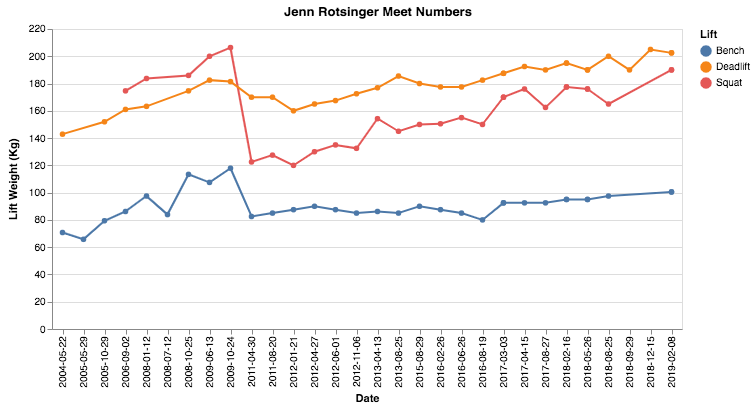

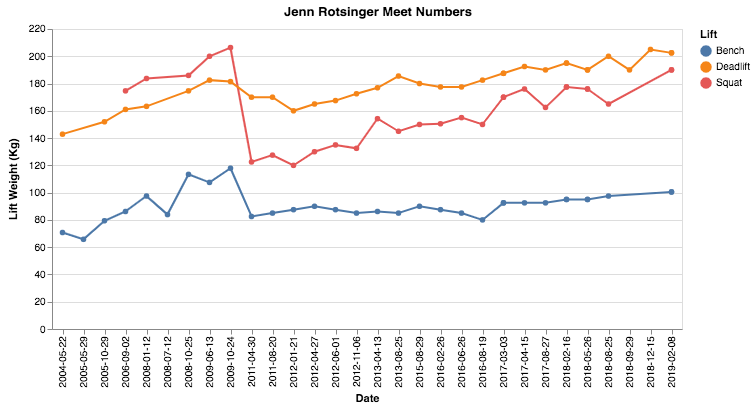

In [94]:
#quickviz
alt.Chart(Bonnie_Bests).mark_line(point=True).encode(
    x='Date',
    y='Lift Weight (Kg)',
    color='Lift',
    tooltip=['MeetName', 'Lift Weight (Kg)', 'WeightClassKg']
    ).properties(
    title='Jenn Rotsinger Meet Numbers')

In [91]:
#The Wilks and Glossbrenner scores are good overall measures of lifting ability. Let's see if they improve over time. 
Bonnie_WandG = Bonnie.loc[:, ['Age', 'Place', 'Date', 'MeetName', 'WeightClassKg', 'Wilks', 'Glossbrenner']]

In [ ]:
alt.Charts(Bonnie_WandG).mark_line(points=True).encode(
    x='Date',
    y='')